In [1]:
import math
from itertools import combinations
from pathlib import Path
from typing import List, Tuple
import airlab as al

from tqdm import tqdm
import matplotlib.pyplot as plt
import nibabel as nib
import cv2
import numpy as np
import torch
from einops import rearrange
from ipywidgets import fixed, interact
from monai import transforms as tfm
from monai.data import Dataset, DataLoader
from monai.data.meta_tensor import MetaTensor
from wbpetct.data import FDG_PET_CT_Dataset, get_train_valid_loaders

In [2]:
np.set_printoptions(precision=2, suppress=True)
torch.set_printoptions(precision=2, sci_mode=False)

In [3]:
def plot_means(volume, batch=0, show=False):

    if len(volume.shape) == 4:
        volume = volume[batch]

    fig, axs = plt.subplots(1, 3)

    for i in range(3):
        axs[i].imshow(np.mean(volume, axis=i), cmap="gray")
        axs[i].set_axis_off()

    if show:
        plt.show()
        return

    return fig, axs

In [5]:
raw_data_path = "/sc-scratch/sc-scratch-gbm-radiomics/tcia/manifest-1654187277763/nifti/FDG-PET-CT-Lesions"

data_path = Path("/sc-scratch/sc-scratch-gbm-radiomics/tcia/manifest-1654187277763/nifti/FDG-PET-CT-Lesions-data2")
registered_dir = data_path / "registered"
processed_dir = data_path / "processed"

In [17]:
load = tfm.LoadImage()
processed_images = list(processed_dir.glob("*.nii.gz"))

In [18]:
img, meta = load(processed_images[0])

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

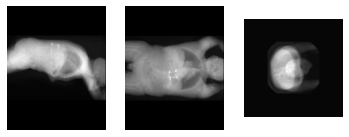

In [19]:
plot_means(img)

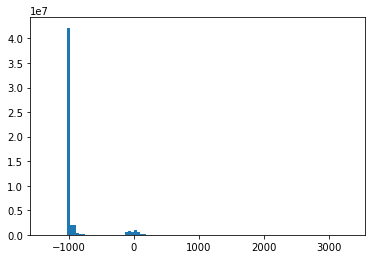

In [24]:
plt.hist(img.numpy().flatten(), bins=100);